<h1>EDA Project: Analysis of Movies and Series on Netflix</h1>


<b>Project Objective</b>
<P></P>
The objective of this project is to perform an exploratory analysis of the data available on the Netflix platform, focusing on movies and series to discover patterns, trends and key characteristics that can help to better understand the platform's catalog. The project includes the use of visualization techniques to communicate the findings effectively.

<b>Data Description</b>
<p></p>
The database contains information about movies and series available on Netflix, with the following columns:

<li>id: Unique identifier.</li>
<li>type: Indicates whether the content is a movie or series.</li>
<li>title: Title of the content.</li>
<li>director: Director of the movie or series.</li>
<li>release_year: Year in which it was released.</li>
<li>rating: Rating of the content (e.g. PG, R, etc.).</li>
<li>duration: Duration of the content.</li>
<li>description: Brief synopsis of the content.</li>

<b>Key Questions to Answer in the Analysis</b><p></p>

<li>What is the ratio of movies to series on Netflix?</li>
<li>How has content releases evolved over the years?</li>
<li>Who are the most prolific directors on Netflix?</li>
<li>Is there a pattern in terms of the type of content (movie or series) directed by the most prolific directors?</li>
<li>Is there a significant difference in the average length between movies and series?</li>
<li>How does the length of movies vary by genre or rating?</li>
<li>What is the distribution of ratings across the Netflix catalog?</li>
<li>Does content with certain ratings tend to last longer or shorter?</li>
<li>How has the amount of content released per year changed?</li>
<li>Is there a trend in the ratings assigned to content over time?</li>

In [1]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy import stats as st
from matplotlib import pyplot as plt

In [3]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [9]:
display(df.head())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [11]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df['director']=df['director'].fillna('unknown')
df['cast']=df['cast'].fillna('unknown')
df['country']=df['country'].fillna('unknown')
df['rating']=df['rating'].fillna('unknown')
df['duration']=df['duration'].fillna('unknown')

In [15]:
df=df.dropna()
df.reset_index(drop=True)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8792,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8793,s8804,TV Show,Zombie Dumb,unknown,unknown,unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8794,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8795,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [17]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [19]:
df.duplicated().sum()

0

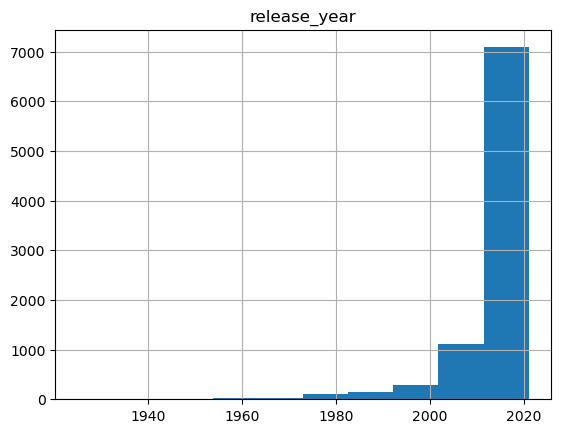

In [27]:
df.hist()
plt.show()

<li>The Netflix catalog dataframe contains 8807 entries and 12 columns.</li>
<li>The contents have a release year ranging from 1925 to 2021 with an ascending distribution to the right, with a release peak between 2010 and 2021</li>
<li>Empty categorical values ​​were found, which were replaced by the word "unknown"</li>

<h1> Analyse data </h1>

<h3>What is the ratio of movies to series on Netflix?</h3>

In [31]:
type_counts = df['type'].value_counts()
print(type_counts)

type
Movie      6131
TV Show    2666
Name: count, dtype: int64


In [35]:
proportion = (type_counts['Movie'] / type_counts['TV Show'])
print(f"Ratio of movies to TV shows: {proportion:.2f}")

Ratio of movies to TV shows: 2.30


type
Movie      69.694214
TV Show    30.305786
Name: count, dtype: float64


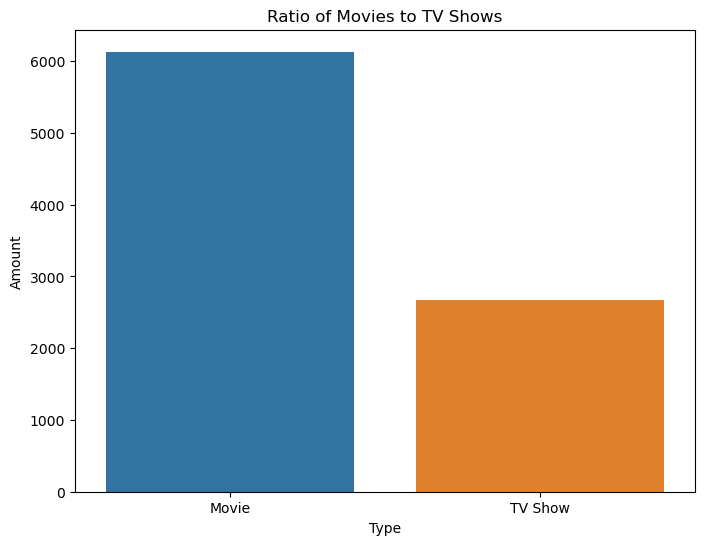

In [39]:
# Percentage
type_percent = (type_counts / type_counts.sum()) * 100
print(type_percent)

# Temporary DataFrame to use with seaborn
type_counts_df = type_counts.reset_index()
type_counts_df.columns = ['type', 'count']

# Graph
plt.figure(figsize=(8, 6))
sns.barplot(x='type', y='count', data=type_counts_df)

plt.title('Ratio of Movies to TV Shows')
plt.ylabel('Amount')
plt.xlabel('Type')

plt.show()

<li>In the dataset, 6131 items were found classified as "movie" and 2666 items were classified as "TV Show". This tells us that the ratio of movies to TV shows is 2.30, meaning that for each TV show in the dataset, there are approximately 2.3 movies.</li>

<li>On the other hand, we see in the graph that 69.69% of Netflix content is movies and 30.30% is TV shows.</li>

<h3>How has content release evolved over the years?</h3>

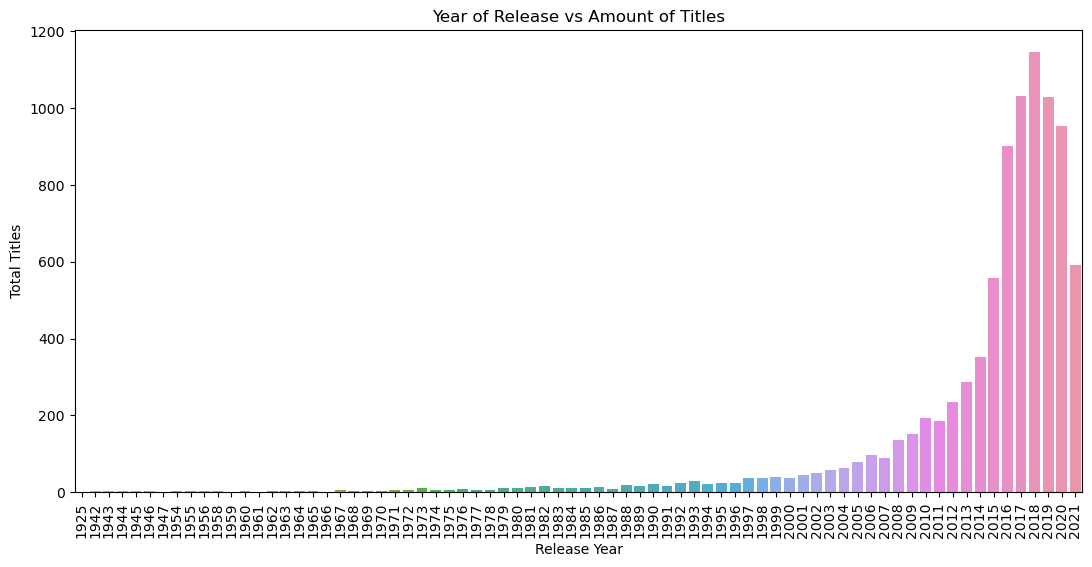

In [44]:
# Group by release year and count titles
x = df.groupby(['release_year'])['title'].count().reset_index()

# Rename columns for clarity
x.columns = ['release_year', 'total_titles']

# Graph
plt.figure(figsize=(13, 6))
sns.barplot(x='release_year', y='total_titles', data=x)

plt.xticks(rotation=90)

plt.title('Year of Release vs Amount of Titles')
plt.ylabel('Total Titles')
plt.xlabel('Release Year')

plt.show()

<li>Since the 2000s, there has been a notable growth in the number of titles released, with a sharp increase especially after 2010.</li>
<li>This coincides with Netflix's global expansion and the increase in its content catalog.</li>
<li>A peak is seen around the year 2018-2019, followed by a slight decline in the following years. This may be due to factors such as the COVID-19 pandemic, which impacted content production globally.</li>
<li>Before the 2000s, the amount of content released is very low, which is consistent with the fact that Netflix started adding content more aggressively with the arrival of streaming, around 2007.</li>

<h3>Who are the most prolific directors on Netflix?</h3>

In [48]:
director_counts=df['director'].value_counts().reset_index()

,director,total_titles
1,Rajiv Chilaka,19
2,"Raúl Campos, Jan Suter",18
3,Suhas Kadav,16
4,Marcus Raboy,16
5,Jay Karas,14
6,Cathy Garcia-Molina,13
7,Jay Chapman,12
8,Youssef Chahine,12
9,Martin Scorsese,12
10,Steven Spielberg,11


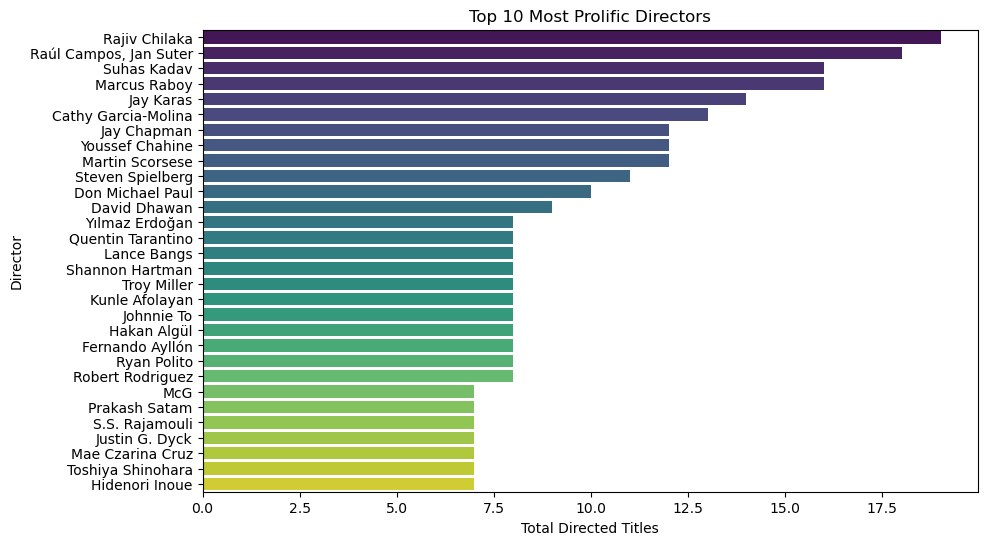

In [52]:
# Rename columns for clarity
director_counts.columns = ['director', 'total_titles']
director_counts = director_counts[director_counts['director'] != 'unknown']

top_directors = director_counts.head(30)

# Graph
plt.figure(figsize=(10, 6))
sns.barplot(x='total_titles', y='director', data=top_directors, palette='viridis')

plt.title('Top 10 Most Prolific Directors')
plt.xlabel('Total Directed Titles')
plt.ylabel('Director')

display(top_directors)

plt.show()

<li>Rajiv Chilaka is the director with the most titles on the platform, with around 19 productions. This could suggest that Rajiv has directed multiple films or episodes of series on Netflix, perhaps with a specialization in animated or other series with multiple episodes or seasons.</li>

<li>Raúl Campos and Jan Suter follow on the list with approximately 16 titles directed, which places them as other of the most prolific directors in the Netflix catalog.</li>

<li>Other notable directors include Suhas Kadav, Marcus Raboy, and Jay Karas, each with more than 10 titles directed, suggesting that they are also important contributors to Netflix content.</li>

<li>Diversity of styles: Names like Martin Scorsese and Steven Spielberg, who are world-renowned directors for their work in feature films, can be seen alongside other lesser-known but prolific directors in their field.</li>

<li>Number of titles: Directors on this list have directed a range from approximately 5 to almost 19 titles, which shows a wide spectrum of contributions. Those with fewer titles still have a significant presence in the catalog.</li>

<h3>Is there a pattern regarding the type of content (movie or TVShow) directed by the most prolific directors?</h3>

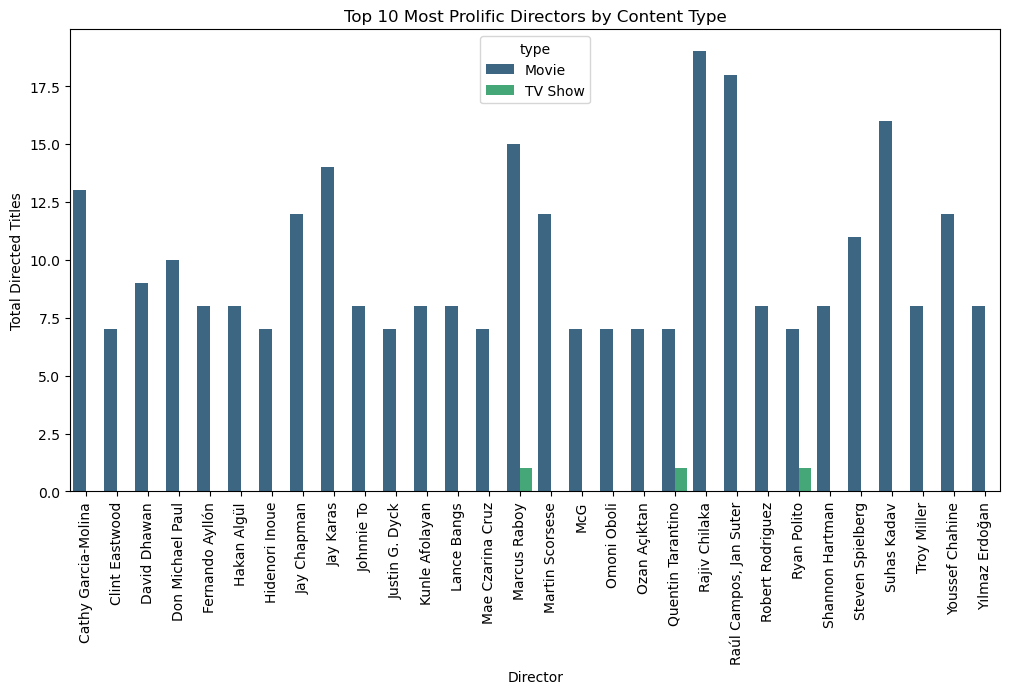

In [62]:
# Filter the dataframe to exclude the director "unknown"
df_filtered = df[df['director'] != 'unknown']

# Count the number of titles by director and type of content (movie or TV show)
director_type_counts = df_filtered.groupby(['director', 'type'])['title'].count().reset_index()

# Rename columns for clarity
director_type_counts.columns = ['director', 'type', 'total_titles']

# Select the most prolific directors
top_directors = director_type_counts.groupby('director')['total_titles'].sum().nlargest(30).index

# Filter the original DataFrame for the most prolific directors
top_directors_df = director_type_counts[director_type_counts['director'].isin(top_directors)]

# Graph
plt.figure(figsize=(12, 6))
sns.barplot(x='director', y='total_titles', hue='type', data=top_directors_df, palette='viridis')

plt.title('Top 10 Most Prolific Directors by Content Type')
plt.xlabel('Director')
plt.ylabel('Total Directed Titles')

plt.xticks(rotation=90)

plt.show()

<li>Most of the directors on this list have directed primarily films, represented in dark blue. Some directors, such as Cathy Garcia-Molina, Clint Eastwood, David Dhawan, and Rajiv Chilaka, have a very high proportion of films in their contributions.</li>
<li>Marcus Raboy and Raúl Campos/Jan Suter are directors who have worked in both types of content. However, films still predominate in their contributions.</li>
<li>Quentin Tarantino also has a small number of TV shows directed, but the majority of his work is still films.</li>
<li>Some directors have a very high number of titles directed, such as Rajiv Chilaka, Raúl Campos/Jan Suter, and Marcus Raboy, who have more than 15 titles in total. Others, such as Hakan Algül and Fernando Ayllón, have a more moderate number of productions, but with a similar proportion of films.</li>

<h3>Is there a significant difference in the average duration between movies and series?</h3>

In [68]:
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [70]:
def extract_minutes(duration):
    match = re.search(r'(\d+)\s*min', duration)  
    if match:
        return int(match.group(1))
    return None

In [72]:
movies['duration_minutes'] = movies['duration'].apply(extract_minutes)

C:\Users\laura\AppData\Local\Temp\ipykernel_4300\1493063014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration_minutes'] = movies['duration'].apply(extract_minutes)


In [74]:
movies = movies.dropna(subset=['duration_minutes'])

In [78]:
mean_movie_duration = movies['duration_minutes'].mean()
print(f"Average length of movies: {mean_movie_duration} minutos")

Average length of movies: 99.57718668407311 minutos


In [80]:
def extract_seasons(duration):
    match = re.search(r'(\d+)\s*Season', duration)  
    if match:
        return int(match.group(1))
    return None

In [82]:
tv_shows['seasons'] = tv_shows['duration'].apply(extract_seasons)

C:\Users\laura\AppData\Local\Temp\ipykernel_4300\3114796322.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].apply(extract_seasons)


In [84]:
tv_shows = tv_shows.dropna(subset=['seasons'])

In [86]:
mean_tv_seasons = tv_shows['seasons'].mean()
print(f"Average number of seasons for TV shows: {mean_tv_seasons} temporadas")

Average number of seasons for TV shows: 1.7513128282070518 temporadas


According to the dataframe being worked on, the length of movies is given by minutes, while the length of TV shows is given by the number of seasons, this is problematic for a direct comparison because the seasons of a show can have very varied lengths (some shows can have seasons of 10 episodes, while others can have more than 20).
It was found that:
<li>Average length of movies: is approximately 99.58 minutes, which is reasonable for a standard movie.</li>
<li>Average number of seasons for TV shows: 1.75 seasons, which indicates that many shows have one or two seasons, but does not necessarily provide information about the amount of actual content, since the length of the seasons can vary greatly.</li>

<h3>How does movie length vary by genre or rating?</h3>

In [93]:
duration_stats_by_rating = movies.groupby('rating')['duration_minutes'].agg(['mean',  'count'])
print(duration_stats_by_rating)

                mean  count
rating                     
G          90.268293     41
NC-17     125.000000      3
NR         94.533333     75
PG         98.282230    287
PG-13     108.330612    490
R         106.720201    797
TV-14     110.290820   1427
TV-G       79.666667    126
TV-MA      95.889913   2062
TV-PG      94.851852    540
TV-Y       48.114504    131
TV-Y7      66.287770    139
TV-Y7-FV   68.400000      5
UR        106.333333      3
unknown    76.000000      2


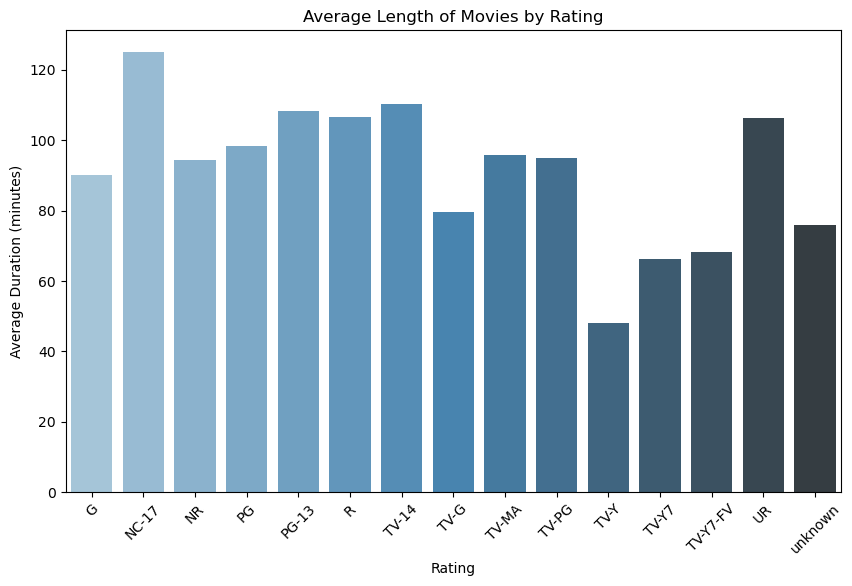

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=duration_stats_by_rating.index, y=duration_stats_by_rating['mean'], palette='Blues_d')
plt.title('Average Length of Movies by Rating')
plt.ylabel('Average Duration (minutes)')
plt.xlabel('Rating')
plt.xticks(rotation=45)
plt.show()

<h3>How has the amount of content released per year changed?</h3>

C:\Users\laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\laura\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


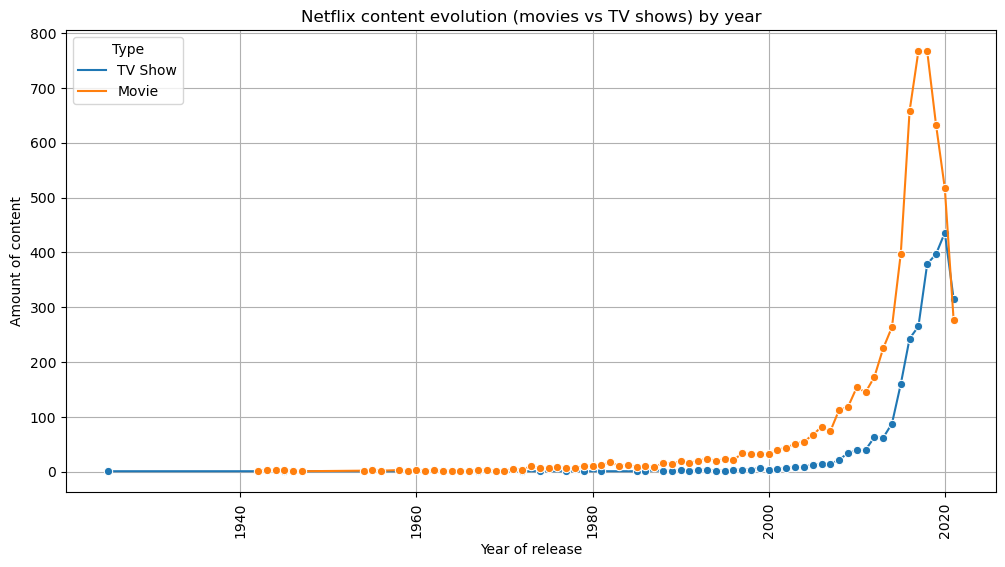

In [99]:
# Group by release year and content type (movie or TV show) and count how many titles are in each category
content_by_year_type = df.groupby(['release_year', 'type'])['title'].count().reset_index()

content_by_year_type.columns = ['Year', 'Type', 'Content Count']

# Graph
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Content Count', hue='Type', data=content_by_year_type, marker='o')

plt.title('Netflix content evolution (movies vs TV shows) by year')
plt.xlabel('Year of release')
plt.ylabel('Amount of content')
plt.xticks(rotation=90) 
plt.grid(True)
plt.show()


<h2>Conclusions</h2>

Netflix has significantly increased its content production and acquisition over the past 15-20 years, peaking around 2018-2019. This is likely related to its expansion into more markets and its effort to offer original and licensed content to a wider audience. However, after this peak, there seems to be a slight decline, which could be related to challenges in content production or strategic changes at the platform.

Most of the prolific directors on Netflix have primarily directed films, while only a few have a significant contribution to television shows.

The presence of names like Martin Scorsese, Steven Spielberg, and Quentin Tarantino indicates that there are internationally renowned directors who have contributed primarily with films, while directors like Raúl Campos/Jan Suter seem to have worked on more varied projects, including TV shows.